In [1]:
!pip install google-play-scraper

In [3]:
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np

In [8]:
result, continuation_token = reviews(
    'com.ittp.igracias',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [9]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))

In [11]:
data["content"]

0     Banyak bug , jadwal gak bisa keliatan ,niat ga...
1     UI yang baru dimenu Jadwal tidak bisa cek jam ...
2     Tidak user friendly dan masih banyak fitur yan...
3     UI downgrade dari versi sebelumnya yang sudah ...
4     Aplikasi bug mulu.. sekarang di bagian jadwaln...
                            ...                        
75                                      Guuuuuuuuuuu ud
76                                               Mantap
77                                                 Good
78                                                  Sip
79                                              Josssss
Name: content, Length: 80, dtype: object

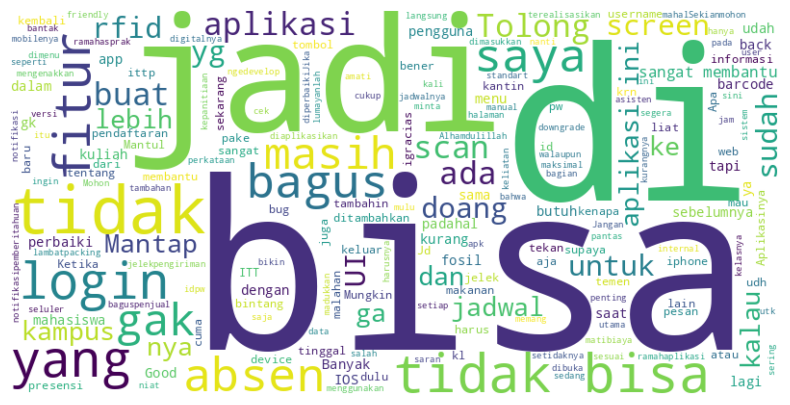

In [17]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


data["content"] = data["content"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

all_text = ' '.join(data["content"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()